In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

## Fake Data Table Production

In [4]:
longitudes = [20, 25, 30, 35, -30, -32, -33, -150, -160, 60]
latitudes = [-37, -39, -40, -42, 20, 22, 24, 30, 50, -10]
profile_nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
percentage_scores = [0.1, 0.2, 0.3, 0.1, 0.8, 0.9, 1, 0.6, 0.4, 1]

In [5]:
def make_full_table(lats, lons, profiles, scores):
    full = {'Profile ID': profile_nums, 'Quality Score': percentage_scores, 'Longitudes': longitudes, 'Latitudes': latitudes}
    full_table = pd.DataFrame(data = full).set_index('Profile ID')
    return(full_table)

In [6]:
full_df = make_full_table(latitudes, longitudes, profile_nums, percentage_scores)
full_df

,Quality Score,Longitudes,Latitudes
Profile ID,,,
1,0.1,20,-37
2,0.2,25,-39
3,0.3,30,-40
4,0.1,35,-42
5,0.8,-30,20
6,0.9,-32,22
7,1.0,-33,24
8,0.6,-150,30
9,0.4,-160,50


## Quality Score Table Production

In [7]:
def make_profile_table(profiles, scores):
    d = {'Profile ID': profiles, 'Quality Score': scores}
    profile_table = pd.DataFrame(data = d).set_index('Profile ID')
    return(profile_table)

In [8]:
quality_table = make_profile_table(profile_nums, percentage_scores)
quality_table

,Quality Score
Profile ID,
1,0.1
2,0.2
3,0.3
4,0.1
5,0.8
6,0.9
7,1.0
8,0.6
9,0.4


## Correlation Score Production

In [9]:
corr = full_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = seaborn.diverging_palette(220, 10, as_cmap=True)

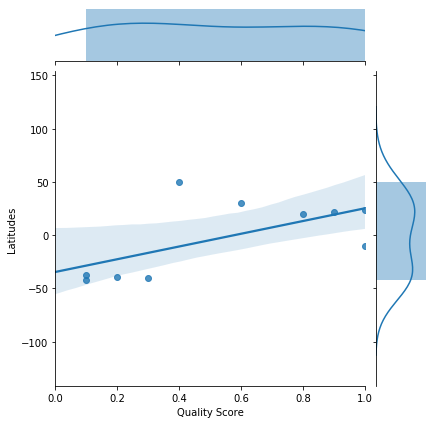

In [10]:
fig = seaborn.jointplot("Quality Score", "Latitudes", full_df, kind="reg")
fig.ax_joint.set_xlim((0, 1))
fig.savefig('jointplot.png')
